In [10]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Load the dataset
dataset = pd.read_csv('dataset/emails.csv')
dataset.shape

(5728, 2)

In [12]:
dataset.head() 

text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

In [13]:
# Show dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [14]:
# Show dataset statistics
dataset.describe()

spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

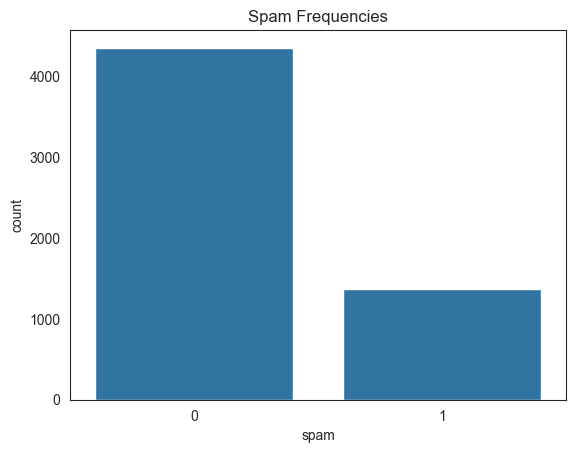

In [15]:
# Visualize spam frequencies
plt.figure(dpi=100)
sns.countplot(x='spam', data=dataset)
plt.title("Spam Frequencies")
plt.show()

In [16]:
# Check for missing data for each column 
dataset.isnull().sum()

text    0
spam    0
dtype: int64

In [17]:
# Check for duplicates and remove them 
dataset.drop_duplicates(inplace=True)

In [18]:
# Cleaning data from punctuation and stopwords and then tokenizing it into words (tokens)
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [19]:
# TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer=process)
message = tfidf_vectorizer.fit_transform(dataset['text'])

In [20]:
# Save the vectorizer
dump(tfidf_vectorizer, open("vectorizer.pkl", "wb"))

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(message, dataset['spam'], test_size=0.20, random_state=0)

In [22]:
# Model creation
NB_model = MultinomialNB()

In [23]:
# Model training
NB_model.fit(X_train, y_train)

MultinomialNB()

In [24]:
# Model saving
dump(NB_model, open("NB_model.pkl", 'wb'))

In [25]:
# Model predictions on test set
y_pred = NB_model.predict(X_test)

In [26]:
# Model Evaluation | Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

90.34240561896401

In [27]:
# Model Evaluation | Classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94       870\n           1       0.99      0.59      0.74       269\n\n    accuracy                           0.90      1139\n   macro avg       0.94      0.80      0.84      1139\nweighted avg       0.91      0.90      0.89      1139\n'

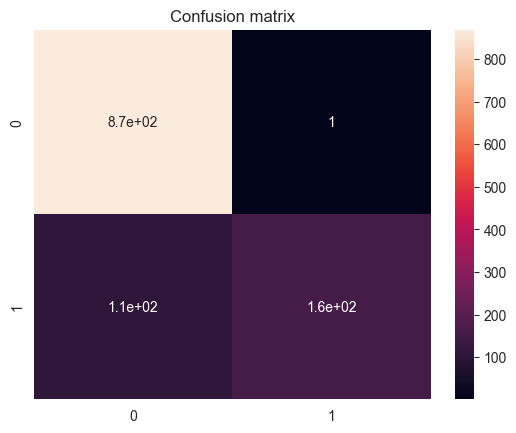

In [28]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [29]:
# Use Support Vector Machine (SVM) for spam detection
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create and train the SVM model
svm_model = make_pipeline(StandardScaler(with_mean=False), SVC(probability=True, kernel='linear'))
svm_model.fit(X_train, y_train)

# Evaluate the SVM model
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Model Accuracy: {svm_accuracy * 100:.2f}%")

SVM Model Accuracy: 97.54%


In [30]:
dump(svm_model, open("SVM_model.pkl", 'wb'))

In [31]:
# Use Logistic Regression for spam detection
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Evaluate the Logistic Regression model
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Model Accuracy: {logistic_accuracy * 100:.2f}%")

Logistic Regression Model Accuracy: 97.10%


In [32]:
dump(logistic_model, open("LOGISTIC_model.pkl", 'wb'))

In [33]:
# Use Random Forest for spam detection
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_model.fit(X_train, y_train)

# Evaluate the Random Forest model
rf_predictions = random_forest_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Model Accuracy: {rf_accuracy * 100:.2f}%")

Random Forest Model Accuracy: 96.84%


In [34]:
dump(random_forest_model, open("RANDOM_FOREST_model.pkl", 'wb'))

In [35]:
# Use LSTM for spam detection
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad the dataset
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(dataset['text'])
X = tokenizer.texts_to_sequences(dataset['text'])
X = pad_sequences(X, maxlen=100)
y = dataset['spam']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Model Accuracy: {lstm_accuracy * 100:.2f}%")

Epoch 1/5


c:\Users\RAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.8015 - loss: 0.4337 - val_accuracy: 0.9772 - val_loss: 0.0909
Epoch 2/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.9745 - loss: 0.0872 - val_accuracy: 0.9842 - val_loss: 0.0504
Epoch 3/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9941 - loss: 0.0243 - val_accuracy: 0.9903 - val_loss: 0.0250
Epoch 4/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9984 - loss: 0.0078 - val_accuracy: 0.9930 - val_loss: 0.0196
Epoch 5/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 0.9939 - val_loss: 0.0224
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9916 - loss: 0.0261
LSTM Model Accuracy: 99.39%


In [36]:
dump(lstm_model, open("lstm_model.pkl", 'wb'))

In [37]:
# Read an external text file and predict if it's spam or not
file_path =r"C:\Users\RAVI\OneDrive\Desktop\Final AI LAB Project\test\spam\test1.txt"
with open(file_path, 'r') as file:
    email_content = file.read()
email_vectorized_spam = tfidf_vectorizer.transform([email_content])

In [38]:
# Display non-zero elements with their indices
print("\nNon-zero elements:")
print(email_vectorized_spam)


Non-zero elements:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 28 stored elements and shape (1, 37229)>
  Coords	Values
  (0, 916)	0.11836307701257105
  (0, 3638)	0.03704089180682669
  (0, 6072)	0.1722515250979866
  (0, 6790)	0.29773770868195304
  (0, 10011)	0.13469002723719625
  (0, 11123)	0.18426697697710606
  (0, 11430)	0.1374210880946551
  (0, 13718)	0.2852744769692658
  (0, 14069)	0.2653095659013681
  (0, 15429)	0.13932618167355798
  (0, 15459)	0.1915081757384203
  (0, 16946)	0.10737265203730167
  (0, 21059)	0.19843028030507393
  (0, 23153)	0.14824033652944105
  (0, 23269)	0.12403402671674615
  (0, 24530)	0.13326520189084284
  (0, 25242)	0.18946119683666235
  (0, 26270)	0.21553643253173918
  (0, 26968)	0.13040802570287555
  (0, 28057)	0.13514676411914564
  (0, 28879)	0.16520732787181372
  (0, 30288)	0.18867306302284576
  (0, 30334)	0.11073405746747421
  (0, 32483)	0.21099513318385138
  (0, 33905)	0.15358121408802536
  (0, 34048)	0.17077950788411222
  (0, 34268)	

In [39]:
# Check the frequency of a specific word in the vectorized email
word = 'bank' 
if word in tfidf_vectorizer.vocabulary_:
    word_index = tfidf_vectorizer.vocabulary_[word]
    frequency = email_vectorized_spam.toarray()[0][word_index]
    print(f"The word '{word}' appears with a frequency of {frequency}.")
else:
    print(f"The word '{word}' is not in the vocabulary.")

The word 'bank' appears with a frequency of 0.1722515250979866.


In [40]:
print(process(email_content))

['Subject', 'Urgent', 'Assistance', 'Required', 'â€“', 'Immediate', 'Transfer', 'Dear', 'Beneficiary', 'Prince', 'Adewale', 'Royal', 'House', 'Lagos', 'Due', 'political', 'unrest', 'must', 'transfer', '12500000', 'Nigeria', 'selected', 'trustworthy', 'partner', 'help', 'receive', '20', 'total', 'sum', 'Kindly', 'send', 'bank', 'details', 'full', 'name', 'ID', 'copy', 'expedite', 'process', 'Time', 'essence', 'â€“', 'delay', 'result', 'lost', 'funds', 'God', 'blessed', 'opportunity', 'Sincerely', 'Prince', 'Adewale', 'Ibukun', 'royaltrustnigeriagovorg']


In [48]:
import pickle

# Load the Naive Bayes model from the .pkl file
with open('NB_model.pkl', 'rb') as f:
    NB_model = pickle.load(f)

# Predict using the loaded model
NB_prediction = NB_model.predict(email_vectorized_spam)

# Display result
print("Spam" if NB_prediction[0] == 1 else "Not Spam")

Not Spam


In [50]:
import pickle

# Load the SVM model from the .pkl file
with open('SVM_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

# Predict using the loaded SVM model
svm_email_prediction = svm_model.predict(email_vectorized_spam)

# Display result
print("Spam" if svm_email_prediction[0] == 1 else "Not Spam")


Spam


In [51]:
import pickle

# Load the Logistic Regression model from the .pkl file
with open('LOGISTIC_model.pkl', 'rb') as f:
    logistic_model = pickle.load(f)

# Predict using the loaded model
logistic_email_prediction = logistic_model.predict(email_vectorized_spam)

# Display result
print("Spam" if logistic_email_prediction[0] == 1 else "Not Spam")


Spam


In [52]:
import pickle

# Load the Random Forest model from the .pkl file
with open('RANDOM_FOREST_model.pkl', 'rb') as f:
    random_forest_model = pickle.load(f)

# Predict using the loaded Random Forest model
rf_email_prediction = random_forest_model.predict(email_vectorized_spam)

# Display result
print("Spam" if rf_email_prediction[0] == 1 else "Not Spam")


Not Spam


In [ ]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Model Accuracy: {lstm_accuracy * 100:.2f}%")

email_sequence = tokenizer.texts_to_sequences([email_content])
email_padded = pad_sequences(email_sequence, maxlen=100)
lstm_email_prediction = lstm_model.predict(email_padded)
print("Spam" if lstm_email_prediction[0][0] > 0.5 else "Not Spam")

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9855 - loss: 0.0553
LSTM Model Accuracy: 98.42%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Not Spam


In [53]:
# Read an external text file and predict if it's spam or not
import pickle

with open('vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer_k = pickle.load(f)

# Step 2: Read the email content from the file
file_path_ham = r"C:\Users\RAVI\OneDrive\Desktop\Final AI LAB Project\test\ham\test1.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    email_content = file.read()

# Step 3: Vectorize the email content using the loaded vectorizer
email_vectorized_ham = tfidf_vectorizer.transform([email_content])

In [61]:
# Display non-zero elements with their indices
print("\nNon-zero elements:")
print(email_vectorized_ham)


Non-zero elements:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 35 stored elements and shape (1, 37229)>
  Coords	Values
  (0, 3638)	0.031781169580554415
  (0, 7132)	0.2276362121416487
  (0, 8445)	0.1233849356684998
  (0, 8804)	0.1488844449741745
  (0, 9185)	0.11510038338657348
  (0, 10536)	0.11667403004911026
  (0, 10810)	0.24966524023130748
  (0, 11436)	0.22509236127538929
  (0, 11467)	0.2554596325459668
  (0, 12006)	0.20985096788531746
  (0, 14701)	0.1412200327500817
  (0, 14755)	0.15118843681827648
  (0, 14762)	0.193616332110318
  (0, 15931)	0.10018231566644036
  (0, 18477)	0.24966524023130748
  (0, 22082)	0.11441689103141182
  (0, 22204)	0.2716942683209663
  (0, 22675)	0.11127191933451011
  (0, 22715)	0.20695977837511667
  (0, 23455)	0.08186657948107007
  (0, 25248)	0.18634347928987607
  (0, 27080)	0.11309248400022641
  (0, 27625)	0.15047953375609183
  (0, 27954)	0.1320335345231975
  (0, 28642)	0.129279111957063
  (0, 32068)	0.11419228819144059
  (0, 33040)	0.199

In [62]:
print(process(email_content))

['Subject', 'Update', 'AI', 'Project', 'Progress', 'Hey', 'team', 'wanted', 'give', 'quick', 'update', 'AI', 'project', 'finished', 'integrating', 'YOLOv8', 'model', 'detection', 'module', 'it’s', 'working', 'fine', 'test', 'dataset', 'still', 'need', 'work', 'reidentification', 'tracking', 'Let’s', 'meet', 'Thursday', 'class', 'divide', 'tasks', 'Please', 'come', 'parts', 'ready', 'merge', 'final', 'report', 'I’ve', 'uploaded', 'current', 'codebase', 'GitHub', '–', 'check', 'dev', 'branch', 'Cheers', 'Anika']


In [54]:
import pickle

# Load the Naive Bayes model from the .pkl file
with open('NB_model.pkl', 'rb') as f:
    NB_model = pickle.load(f)

# Predict using the loaded model
NB_prediction = NB_model.predict(email_vectorized_ham)

# Display result
print("Spam" if NB_prediction[0] == 1 else "Not Spam")

Not Spam


In [56]:
import pickle

# Load the SVM model from the .pkl file
with open('SVM_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

# Predict using the loaded SVM model
svm_email_prediction = svm_model.predict(email_vectorized_ham)

# Display result
print("Spam" if svm_email_prediction[0] == 1 else "Not Spam")


Not Spam


In [58]:
import pickle

# Load the Logistic Regression model from the .pkl file
with open('LOGISTIC_model.pkl', 'rb') as f:
    logistic_model = pickle.load(f)

# Predict using the loaded model
logistic_email_prediction = logistic_model.predict(email_vectorized_ham)

# Display result
print("Spam" if logistic_email_prediction[0] == 1 else "Not Spam")


Not Spam


In [59]:
import pickle

# Load the Random Forest model from the .pkl file
with open('RANDOM_FOREST_model.pkl', 'rb') as f:
    random_forest_model = pickle.load(f)

# Predict using the loaded Random Forest model
rf_email_prediction = random_forest_model.predict(email_vectorized_ham)

# Display result
print("Spam" if rf_email_prediction[0] == 1 else "Not Spam")

Not Spam
